In [68]:
# Import the Pandas package
import pandas as pd
import numpy as np
import re 
def clean_text(string,replace='_'):
    regex = '[^A-Za-z0-9]+'
    return re.sub(regex, replace, string)
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

# <span style="color: red"> Problem Statement: Police Violence in the US </span>

In the US, the federal state and local governments possess a limited "state monoploly on violence." Through the democratic process, citizens authorize the government's sworn officers to excercise this monopoly by applying reasonable coercive force to enforce the law. This use of force is in turn restricted by the law, which authorizes only a minimum amount of force under specific circumstances (self-defense, for example). 

Our goal is to model aspects of police violence in the US, at some geographic level, in order to investigae trends over time and associations with demographic, health, economoic indicators. Particularly one thing we would like to see if the call to defund police would have as meaningful an impace as one would think.

- Is there evidene of discrimination in police officer's application of unreasonable force, or in the prosection of the officers involved?
- Are there longitudnal or geographic differences in these injustices?
- Do partterns of departmental misconduct and activity predict future violence?
- **What biases exist in the available data that prevent us from being able tell the full and honest story of these incidents?**

 # <span style="color: blue"> Citizen deaths, police deaths, and other outcomes </span>
- Police shootings
- Citizen fatalities involving police
- Police officer deaths suffered in the line of duty

In [11]:
### Fatal Encounters
deaths_arrests = "data/fatal_encounters/deaths_arrests.csv"
fatal_encounters = "data/fatal_encounters/fatal_encounters_dot_org.csv" 
police_deaths = "data/fatal_encounters/police_deaths_538.csv" 
police_killings = "data/fatal_encounters/police_killings_MPV.csv" 
shootings_wash_post = "data/fatal_encounters/shootings_wash_post.csv"

#### Death and Arrests

In [34]:
pdeaths_arrests = pd.read_csv(deaths_arrests)
pdeaths_arrests[pdeaths_arrests['State'].notnull()]

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3
5,Colorado,Aurora,Aurora Police Department,9.0,3.0,NaN,1.0,NaN,7.0,2.0,...,1906.3,5.9,21182.0,20469.0,19155.0,17455.0,15907.0,15662.0,17729.6,12.4
6,Texas,Austin,Austin Police Department,5.0,7.0,NaN,1.0,NaN,19.0,NaN,...,3642.7,4.6,37024.0,36524.0,33101.0,30687.0,28485.0,24359.0,30631.2,10.4
7,California,Bakersfield,Bakersfield Police Department,3.0,15.0,NaN,1.0,NaN,5.0,NaN,...,1814.7,5.2,16786.0,20912.0,21814.0,21629.0,16822.0,13048.0,18845,12.7
8,Maryland,Baltimore,Baltimore Police Department,27.0,NaN,NaN,NaN,NaN,3.0,1.0,...,10192.2,16.4,47560.0,46232.0,32939.0,29661.0,29044.0,25567.0,32688.6,9.5
9,Louisiana,Baton Rouge,Baton Rouge Police Department,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2132.2,9.3,NaN,NaN,15244.0,13322.0,12829.0,10773.0,13042,7.7


In [45]:
pdeaths_arrests.isnull().sum()/pdeaths_arrests.shape[0]

State                                                            0.898608
City                                                             0.897614
PD                                                               0.898608
Black People Killed by Police (1/1/2013-12/31/2019)              0.907555
Hispanic People Killed by Police (1/1/2013-12/31/2019)           0.929423
Native American People Killed by Police (1/1/2013-12/31/2019)    0.988072
Asian People Killed by Police (1/1/2013-12/31/2019)              0.967197
Pacific Islanders Killed by Police (1/1/2013-12/31/2019)         0.991054
White People Killed by Police (1/1/2013-12/31/2019)              0.909543
Unknown Race People Killed by Police (1/1/2013-12/31/2019)       0.950298
All People Killed by Police (1/1/2013-12/31/2019)                0.898608
Total                                                            0.898608
Black                                                            0.898608
White                                 

In [56]:
dfatal_encounters = pd.read_csv(fatal_encounters) 
dfatal_encounters.count()
#dfatal_encounters.rename(columns = lambda col: clean_text(col),inplace=True)

Unique ID                                                         28621
Subject's name                                                    28622
Subject's age                                                     27608
Subject's gender                                                  28521
Subject's race                                                    28621
Subject's race with imputations                                   28448
Imputation probability                                            28439
URL of image of deceased                                          13130
Date of injury resulting in death (month/day/year)                28622
Location of injury (address)                                      28080
Location of death (city)                                          28586
Location of death (state)                                         28621
Location of death (zip code)                                      28432
Location of death (county)                                      

### Questions that arise from the fields
- What areas have the highest number of deaths?
- What races have the highest number of fatalities?
- What is the distribution of race within the dataset?
- What is the breakdown of gender?
- Are there intersections between gender/race/mental illness?
- What datasets would complement this dataset?
- Who is the source of the data? Forget all ideas of objectivity

In [85]:
# Imputed data means that some of the race/ethnicity was predicted rather recorded"
# For more information here
dfatal_encounters[["Subject's name","Subject's age","Subject's gender","Subject's race","Date of injury resulting in death (month/day/year)","Full Address"]]

,Subject's name,Subject's age,Subject's gender,Subject's race,Date of injury resulting in death (month/day/year),Full Address
0,Samuel H. Knapp,17,Male,European-American/White,01/01/2000,27898-27804 US-101 Willits CA 95490 Mendocino
1,Mark A. Horton,21,Male,African-American/Black,01/01/2000,Davison Freeway Detroit MI 48203 Wayne
2,Phillip A. Blurbridge,19,Male,African-American/Black,01/01/2000,Davison Freeway Detroit MI 48203 Wayne
3,Mark Ortiz,23,Male,Hispanic/Latino,01/01/2000,600 W Cherry Ln Carlsbad NM 88220 Eddy
4,LaTanya Janelle McCoy,24,Female,African-American/Black,01/02/2000,5700 block Mack Road Sacramento CA 95823 Sacra...
5,Lester Miller,53,Male,Race unspecified,01/02/2000,4850 Flakes Mill Road Ellenwood GA 30294 DeKalb
6,Billy Jones,30,Male,African-American/Black,01/02/2000,Pollock Street Kinston NC 28501 Lenoir
7,Terry Rouse,29,Male,African-American/Black,01/02/2000,Pollock Street Kinston NC 28501 Lenoir
8,James Martin Loy,55,Male,Race unspecified,01/03/2000,107 South Grant St. Uniontown PA 15401 Fayette
9,Doris Murphy,42,Female,Race unspecified,01/03/2000,391 Park Ave Baltimore MD 21201 Baltimore City


### Police Killings

In [80]:
dpolice_killings=pd.read_csv(police_killings)
dpolice_killings.isnull().sum()

Victim's name                                                                                                                                                                    0
Victim's age                                                                                                                                                                     0
Victim's gender                                                                                                                                                                 12
Victim's race                                                                                                                                                                    0
URL of image of victim                                                                                                                                                        3888
Date of Incident (month/day/year)                                                                        

### Washington Post Shooting Dataset
In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,000 such shootings recorded by The Post.

A Post investigation found that the FBI undercounted fatal police shootings by more than half. This is because reporting by police departments is voluntary and many departments fail to do so. 

In [84]:
dshootings_wash_post=pd.read_csv(shootings_wash_post)
dshootings_wash_post.count()

id                         5552
name                       5552
date                       5552
manner_of_death            5552
armed                      5339
age                        5307
gender                     5551
race                       4966
city                       5552
state                      5552
signs_of_mental_illness    5552
threat_level               5552
flee                       5290
body_camera                5552
dtype: int64

In [86]:
dshootings_wash_post

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


### Questions that Arise from this dataset?
- What is the most common manner of death?
- How many people were showing signs of mental illness?
- How many people were fleeing?
- How many cases did not have police body camera's involved?

#### Police Fatalities

The police deaths have no missing data

In [73]:
dpolice_deaths = pd.read_csv(police_deaths)
dpolice_deaths.head(50)

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
5,High Sheriff John Caldwell Cook,"Mecklenburg County Sheriff's Office, NC","EOW: Tuesday, October 16, 1804",Cause of Death: Gunfire,Gunfire,1804-10-16,1804,False,Mecklenburg County Sheriff's Office,NC
6,Watchman Christian Luswanger,"New York City Watch, NY","EOW: Thursday, December 25, 1806",Cause of Death: Stabbed,Stabbed,1806-12-25,1806,False,New York City Watch,NY
7,Deputy Sheriff John A. Gooch,"Livingston County Sheriff's Department, KY","EOW: Saturday, March 7, 1807",Cause of Death: Gunfire,Gunfire,1807-03-07,1807,False,Livingston County Sheriff's Department,KY
8,Deputy Sheriff Ebenezer Parker,"Cumberland County Sheriff's Office, ME","EOW: Monday, January 18, 1808",Cause of Death: Assault,Assault,1808-01-18,1808,False,Cumberland County Sheriff's Office,ME
9,Night Watchman George Workner,"Baltimore City Police Department, MD","EOW: Tuesday, March 15, 1808",Cause of Death: Stabbed,Stabbed,1808-03-15,1808,False,Baltimore City Police Department,MD


**This dataset has data from 1808.**

# <span style="color: blue"> Demographics, crime stats, and other data </span>
- Social and economic data
- Political leanings of citizens
- Sales of DoD equipment to law enforcement agencies
- City budgets
- Police department headcounts
- Police department policies and contract provisions
- Juvenile arrests by type of crime and race
- Adult arrests by type of crime, age, gender and race
- Crimes and arrests for the prime city in the four largest metro areas.

In [88]:
budgets = "data/demographics/budgets.csv"
dod_equipment = "data/demographics/dod_equipment_purchases.csv" # probably wont use (KM)
dqs_spending = "data/demographics/dqs_table_88_3.csv" # probably won't use since its by state not city (KM)
education_census = "data/demographics/education_census_bureau.csv" 
housing = "data/demographics/housing.csv"
police_contracts = "data/demographics/police_contracts.csv" #police union contract policies that may make it harder to hold police accountable.
police_employment = "data/demographics/police_employment_fbi.csv" # police employment numbers
police_policies = "data/demographics/police_policies.csv" #explores which departments have common policies believed to reduce police violence
politics = "data/demographics/politics_538.csv"
poverty_census = "data/demographics/poverty_census_bureau.csv"
fisc_data = 'data/demographics/Fisc_Year_Per_Capita_Real_fisc_11-08-2020.csv'

### Fisc Data 

In [97]:
dfisc_data = pd.read_csv(fisc_data)
dfisc_data

,City,Year,Total Revenue,Individual Income Tax,Education Services Expenditure,Social Services and Income Maintenance Expenditure,Transportation Expenditure,Police Protection Expenditure,Environment and Housing Expenditure,Total Expenditures,Intergovernmental Expenditures,Current Operations,Assistance and Subsidies,Census ID - City,City Population
0,AK: Anchorage,2010.0,"6,037",0,"2,880",104,536,434,544,"6,295",0,"4,634",0.0,22002001.0,287677.0
1,AK: Anchorage (City),2010.0,"6,037",0,"2,880",104,536,434,544,"6,295",0,"4,634",0.0,22002001.0,NaN
2,AK: Anchorage (County),2010.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
3,AK: Anchorage,2011.0,"5,816",0,"2,787",93,501,411,389,"5,947",0,"4,667",0.0,22002001.0,293310.0
4,AK: Anchorage (City),2011.0,"5,816",0,"2,787",93,501,411,389,"5,947",0,"4,667",0.0,22002001.0,NaN
5,AK: Anchorage (County),2011.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
6,AK: Anchorage,2012.0,"5,378",0,"2,430",97,337,447,303,"5,543",0,"4,360",0.0,22002001.0,296154.0
7,AK: Anchorage (City),2012.0,"5,378",0,"2,430",97,337,447,303,"5,543",0,"4,360",0.0,22002001.0,NaN
8,AK: Anchorage (County),2012.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
9,AK: Anchorage,2013.0,"5,695",0,"2,472",129,453,454,274,"5,734",0,"4,540",0.0,22002001.0,298233.0


## Police Employment

Dataset not currently in folder due to size. Contains number of police employed. data organized by agency and county not city.

## Poverty Census CSV

This dataset contains numbers of people in poverty per city. No date information available. Data obtained from US census data.

In [15]:
dfpoverty = pd.read_csv(poverty_census)
dfpoverty

,id,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,Margin of Error!!Total MOE!!Population for whom poverty status is determined,Estimate!!Below poverty level!!Population for whom poverty status is determined,Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,Margin of Error!!Percent below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years,Margin of Error!!Total MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years,...,"Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months",Estimate!!Total!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Total MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work
0,310M400US10100,"Aberdeen, SD Micro Area",41450.0,202.0,4743.0,724.0,11.4,1.7,10126.0,78.0,...,1104.0,296.0,45.1,9.0,2557.0,314.0,854.0,264.0,33.4,8.6
1,310M400US10140,"Aberdeen, WA Micro Area",68852.0,420.0,10980.0,1026.0,15.9,1.5,14622.0,159.0,...,1176.0,214.0,39.1,6.3,7664.0,648.0,3407.0,438.0,44.5,3.7
2,310M400US10180,"Abilene, TX Metro Area",156492.0,773.0,24001.0,1639.0,15.3,1.0,39611.0,281.0,...,3591.0,425.0,55.3,4.4,10972.0,987.0,5328.0,874.0,48.6,4.6
3,310M400US10220,"Ada, OK Micro Area",36923.0,307.0,5685.0,532.0,15.4,1.5,8985.0,81.0,...,778.0,154.0,50.7,6.7,2882.0,253.0,1521.0,185.0,52.8,4.5
4,310M400US10260,"Adjuntas, PR Micro Area",18125.0,41.0,11325.0,843.0,62.5,4.6,3882.0,25.0,...,176.0,72.0,77.9,14.3,1719.0,261.0,1428.0,246.0,83.1,5.5
5,310M400US10300,"Adrian, MI Micro Area",93387.0,387.0,11411.0,805.0,12.2,0.9,20595.0,156.0,...,1686.0,237.0,43.2,4.8,7198.0,463.0,2524.0,298.0,35.1,3.4
6,310M400US10380,"Aguadilla-Isabela, PR Metro Area",304964.0,492.0,159107.0,3291.0,52.2,1.1,61191.0,205.0,...,4278.0,474.0,76.2,3.8,29827.0,1119.0,22872.0,894.0,76.7,1.7
7,310M400US10420,"Akron, OH Metro Area",687835.0,821.0,89922.0,3271.0,13.1,0.5,144115.0,406.0,...,15054.0,922.0,44.0,1.8,53758.0,1588.0,20743.0,1159.0,38.6,1.4
8,310M400US10460,"Alamogordo, NM Micro Area",62297.0,397.0,13232.0,1321.0,21.2,2.1,15348.0,72.0,...,778.0,204.0,37.2,8.1,4676.0,445.0,2199.0,397.0,47.0,6.5
9,310M400US10500,"Albany, GA Metro Area",147567.0,792.0,37204.0,2183.0,25.2,1.5,36549.0,334.0,...,2500.0,383.0,47.3,5.5,11564.0,678.0,7022.0,565.0,60.7,3.2


# Housing Demographics Data

#### **Housing data contains various statistics on number and type of housing units in a given city. More than likely the only columns of interest to this group will be the following:**
- ESTIMATE!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing unit with a mortgage!!Median (dollars)
- ESTIMATE!!SELECTED MONTHLY OWNER COSTS (SMOC)!!Housing unit with a mortgage!!Median (dollars) 
- ESTIMATE!!GROSS RENT!!Occupied units paying rent!!Median (dollars)

**Note: Data is organized by metropolitan area not "city". The area may be different from other city data we may use from different sources.
First 52 columns contains summary data for the 50 states plus DC and Puerto Rico** 

In [3]:
dfhousing = pd.read_csv(housing)
dfhousing.head()

,id,Geographic Area Name,Estimate!!HOUSING OCCUPANCY!!Total housing units,Margin of Error!!HOUSING OCCUPANCY!!Total housing units,Percent!!HOUSING OCCUPANCY!!Total housing units,Percent Margin of Error!!HOUSING OCCUPANCY!!Total housing units,Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,Percent Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units,...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!30.0 to 34.9 percent,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more,Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed,Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed,Percent Margin of Error!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Not computed
0,0400000US01,Alabama,2284922,264,2284922,(X),1897576,10370,83.0,0.5,...,8.2,0.7,200448,8100,38.9,1.4,77255,3844,(X),(X)
1,0400000US02,Alaska,319867,200,319867,(X),252199,3658,78.8,1.1,...,8.6,1.7,29456,2795,36.3,3.4,7710,1267,(X),(X)
2,0400000US04,Arizona,3076048,708,3076048,(X),2670441,12014,86.8,0.4,...,9.9,0.6,316994,9214,36.6,1,62700,5017,(X),(X)
3,0400000US05,Arkansas,1389159,337,1389159,(X),1163647,8530,83.8,0.6,...,9.3,0.9,122038,6368,34.3,1.5,46548,3201,(X),(X)
4,0400000US06,California,14367012,1286,14367012,(X),13157873,23844,91.6,0.2,...,9.7,0.3,2463771,26326,43.6,0.4,281867,9284,(X),(X)


In [7]:
list(dfhousing.columns)

['id',
 'Geographic Area Name',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units',
 'Margin of Error!!HOUSING OCCUPANCY!!Total housing units',
 'Percent!!HOUSING OCCUPANCY!!Total housing units',
 'Percent Margin of Error!!HOUSING OCCUPANCY!!Total housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
 'Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
 'Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
 'Percent Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
 'Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
 'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
 'Percent Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units',
 'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate',
 'Margin

In [11]:
list(dfhousing['Geographic Area Name'].head(55)) 

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Puerto Rico',
 'Aberdeen, WA Micro Area',
 'Abilene, TX Metro Area',
 'Adrian, MI Micro Area']

## Education Dataset

**Education census csv**
This csv contains census information on the percentage of the population at various age ranges and by race and gender that has a high school degree or higher. It also include poverty rates and median earnings by level of education attainment. Data including actual high school graduation rates may be more useful, however this could be a good analog. Could also allow creation of a transfer function to estimate median wages in an area based on increase in educational attainment

In [9]:
dfeducation = pd.read_csv(education_census)
dfeducation.head()

,id,Geographic Area Name,Margin of Error!!Percent MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Male!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Margin of Error!!Male MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Percent Male!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Margin of Error!!Percent Male MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Female!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Margin of Error!!Female MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Percent Female!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,...,Margin of Error!!Male MOE!!Population 25 years and over!!Population 35 to 44 years,Estimate!!Percent Male!!Population 25 years and over!!Population 35 to 44 years,Margin of Error!!Percent Male MOE!!Population 25 years and over!!Population 35 to 44 years,Estimate!!Female!!Population 25 years and over!!Population 35 to 44 years,Margin of Error!!Female MOE!!Population 25 years and over!!Population 35 to 44 years,Estimate!!Percent Female!!Population 25 years and over!!Population 35 to 44 years,Margin of Error!!Percent Female MOE!!Population 25 years and over!!Population 35 to 44 years,Estimate!!Total!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Margin of Error!!Total MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Percent!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher
0,310M400US10100,"Aberdeen, SD Micro Area",2.3,2187,107,92.7,3.2,2219,104,96.9,...,107,(X),(X),2290,119,(X),(X),4406,161,94.8
1,310M400US10140,"Aberdeen, WA Micro Area",2.6,3990,176,88.7,3.5,3206,142,84.6,...,97,(X),(X),3789,67,(X),(X),7196,237,86.8
2,310M400US10180,"Abilene, TX Metro Area",1.5,9040,270,86.8,2.0,8101,201,90.2,...,181,(X),(X),8982,109,(X),(X),17141,357,88.3
3,310M400US10220,"Ada, OK Micro Area",2.0,1868,68,89.2,2.9,2091,83,92.1,...,46,(X),(X),2270,63,(X),(X),3959,113,90.7
4,310M400US10260,"Adjuntas, PR Micro Area",6.0,675,90,67.5,9.0,883,108,78.1,...,*****,(X),(X),1131,*****,(X),(X),1558,128,73.1


In [11]:
list(dfeducation.columns)

['id',
 'Geographic Area Name',
 'Margin of Error!!Percent MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Estimate!!Male!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Margin of Error!!Male MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Estimate!!Percent Male!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Margin of Error!!Percent Male MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Estimate!!Female!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Margin of Error!!Female MOE!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Estimate!!Percent Female!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Margin of Error!!Percent 

## DQS SPENDING CSV

**DQS Spending CSV**
This file contains spending as a function of income for 50 stats + washington DC. If our data is going to look at a city level, this may not be helpful. The units are also a little weird.

In [14]:
dfspending = pd.read_csv(dqs_spending)
dfspending.head()

,State,Total,Inter-governmental,Total.1,Basic Education,Higher Education,Public Welfare,Health and Hospitals,Highways,Police,Other,Personal Income ($M)
0,Connecticut......................................,13.2,--,13.2,3.6,1.3,1.5,1.0,0.9,0.5,4.4,"257,714"
1,Maine............................................,18.7,--,18.7,4.1,1.3,5.2,0.7,1.6,0.5,5.4,"62,060"
2,Massachusetts....................................,16.7,0.0,16.7,3.5,1.2,4.8,0.7,0.8,0.6,5.2,"463,931"
3,New Hampshire....................................,13.9,--,13.9,3.7,1.2,3.0,0.2,0.9,0.5,4.2,"80,122"
4,Rhode Island.....................................,19.5,0.0,19.5,4.5,1.2,5.5,0.5,0.8,0.8,6.0,"55,934"


In [15]:
dfspending.shape

(51, 12)

## DOD EQUIP CSV

**DOD Spending csv**
Contains data on dpt of defense sells to police departments. Data is organized by state, but may be able to infer city by station name column. Overall likely not going to be used in this project.

In [11]:
dfDOD = pd.read_csv(dod_equipment)
dfDOD.head(10)

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,state
0,AL,ABBEVILLE POLICE DEPT,6115-01-285-3012,"GENERATOR SET,DIESEL ENGINE",2,Each,9922.25,A,7.0,2018-02-12 00:00:00.000,Alabama
1,AL,ABBEVILLE POLICE DEPT,6230-01-439-3732,"FLOODLIGHT SET,ELECTRIC",1,Each,12000.00,A,1.0,2018-01-31 00:00:00.000,Alabama
2,AL,ABBEVILLE POLICE DEPT,7125-01-466-0952,"CABINET,STORAGE",4,Each,860.74,A,1.0,2018-01-24 00:00:00.000,Alabama
3,AL,ABBEVILLE POLICE DEPT,2530-01-558-2138,"WHEEL,PNEUMATIC TIRE",1,Assembly,2015.00,A,1.0,2018-01-24 00:00:00.000,Alabama
4,AL,ABBEVILLE POLICE DEPT,2320-01-447-3892,"TRUCK,WRECKER",1,Each,331680.00,Q,6.0,2017-11-14 00:00:00.000,Alabama
5,AL,ABBEVILLE POLICE DEPT,5180-01-628-2375,"TOOL KIT,AIRCRAFT MAINTENANCE",3,Kit,1298.00,A,1.0,2018-04-12 00:00:00.000,Alabama
6,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,335.00,D,1.0,2016-09-14 00:00:00.000,Alabama
7,AL,ABBEVILLE POLICE DEPT,4010-00-473-6166,"CHAIN ASSEMBLY,SINGLE LEG",10,Each,160.18,A,1.0,2018-01-23 00:00:00.000,Alabama
8,AL,ABBEVILLE POLICE DEPT,5855-DS-THR-MIMG,THERMAL IMAGINING EQUIPMENT,1,Each,0.00,D,NaN,2016-06-02 00:00:00.000,Alabama
9,AL,ABBEVILLE POLICE DEPT,1005-01-587-7175,"MOUNT,RIFLE",10,Each,1647.00,D,1.0,2016-09-19 00:00:00.000,Alabama


In [13]:
dfDOD.shape

(154780, 11)

## Budgets CSV

#### The budgets CSV file contains fiscally standardized finances for several US cities. This includes spending on policing as well as on services such as  elementary and higher education, roads, parks and rec. A simplified version of this was created in the "SpendPerCapita" csv file ( same information just fewer columns)

 **Fiscally Standardized** refers to the process of accounting for incomes/spendings for cities that envelope multiple counties. In this case, Census data may only include city specific finances and ignore the impact from outlying counties. In some cases the city and the county are essentially one entity and so direct comparisons would be inaccurate. Several assumptions were made in developing the Fiscall standardization. Details can be found here: https://www.lincolninst.edu/sites/default/files/pubfiles/langley_wp20al1.pdf

### Interesting columns
    - year
    - city_name
    - city_population
    - cpi
    - rev_total_city
      'education_services'
     'education'
 'educ_higher'
 'educ_elem_sec'
 'libraries'
 'social_services'
 'public_welfare'
 'welfare_cash'
 'welfare_vendors'
 'welfare_other'
 'public_safety'
 'police'
 'fire'
 'correction'

In [13]:
dfbudgets = pd.read_csv(budgets)
dfbudgets.head(10)

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,cash_other_offsets,cash_other_bonds,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt
0,1977,AK: Anchorage,22002001.0,174500,4.044885,5342.24,4956.92,2148.77,279.32,1869.46,...,178.51,787.93,691.32,NaN,NaN,NaN,4.0,36855.0,NaN,1.0
1,1978,AK: Anchorage,22002001.0,177000,3.759509,5948.99,5490.05,2468.11,403.24,2064.86,...,187.53,1395.82,1158.01,NaN,NaN,NaN,4.0,36804.0,NaN,1.0
2,1979,AK: Anchorage,22002001.0,179600,3.376308,6158.68,5746.64,2573.34,496.97,2076.37,...,249.03,1812.04,1314.62,NaN,NaN,NaN,4.0,36757.0,NaN,1.0
3,1980,AK: Anchorage,22002001.0,178800,2.974757,5654.93,5210.77,2313.62,371.46,1942.16,...,986.73,1330.72,1572.66,NaN,NaN,NaN,4.0,36008.0,NaN,1.0
4,1981,AK: Anchorage,22002001.0,174431,2.696590,6192.83,5736.81,2771.43,338.76,2432.67,...,977.32,1549.51,1669.55,NaN,NaN,NaN,4.0,34557.0,NaN,1.0
5,1982,AK: Anchorage,22002001.0,180969,2.540104,6560.51,6046.89,3169.22,255.78,2913.44,...,904.52,1835.36,1961.75,NaN,NaN,NaN,4.0,35260.0,NaN,1.0
6,1983,AK: Anchorage,22002001.0,195216,2.461044,7382.29,6816.43,3840.59,257.52,3583.07,...,865.35,1142.88,2656.94,NaN,NaN,NaN,4.0,37397.0,NaN,1.0
7,1984,AK: Anchorage,22002001.0,211028,2.359191,7245.14,6668.08,3391.51,276.46,3115.05,...,307.55,998.72,4081.36,NaN,NaN,NaN,4.0,39736.0,NaN,1.0
8,1985,AK: Anchorage,22002001.0,220254,2.278067,8169.09,7471.86,4009.81,210.64,3799.17,...,832.07,377.82,3558.56,NaN,NaN,NaN,4.0,40752.0,NaN,1.0
9,1986,AK: Anchorage,22002001.0,226848,2.236496,7279.60,6330.66,2895.35,149.67,2745.68,...,925.74,1903.24,1942.21,NaN,NaN,NaN,4.0,41229.0,NaN,1.0


In [7]:
dfbudgets.shape

(6232, 662)

In [15]:
list(dfbudgets.loc[30:60])

['year',
 'city_name',
 'id_city',
 'city_population',
 'cpi',
 'rev_total_city',
 'rev_general_city',
 'intergovt_rev_city',
 'igr_federal_city',
 'igr_state_city',
 'own_source_rev_city',
 'taxes_city',
 'tax_property_city',
 'tax_sales_grossrec_city',
 'tax_sales_general_city',
 'tax_sales_selectiv_city',
 'tax_sales_motofuel_city',
 'tax_sales_alcohol_city',
 'tax_sales_tobacco_city',
 'tax_sales_utility_city',
 'tax_sales_other_city',
 'tax_income_indiv_city',
 'tax_income_corp_city',
 'tax_motor_vehicle_city',
 'tax_other_city',
 'charges_misc_rev_city',
 'charges_city',
 'chg_educ_city',
 'chg_higher_ed_city',
 'chg_school_lunch_city',
 'chg_hospitals_city',
 'chg_highways_city',
 'chg_air_transit_city',
 'chg_parking_city',
 'chg_seaport_city',
 'chg_nat_resources_city',
 'chg_parks_rec_city',
 'chg_hous_commdev_city',
 'chg_sewers_city',
 'chg_waste_mgmt_city',
 'chg_other_city',
 'misc_general_rev_city',
 'misc_interest_city',
 'misc_fines_fees_city',
 'misc_spec_assess_city'

In [8]:
dfbudgets.isnull().sum()

year                           0
city_name                      0
id_city                       41
city_population                0
cpi                           82
rev_total_city                 0
rev_general_city               0
intergovt_rev_city             0
igr_federal_city               0
igr_state_city                 0
own_source_rev_city            0
taxes_city                     0
tax_property_city              0
tax_sales_grossrec_city        0
tax_sales_general_city         0
tax_sales_selectiv_city        0
tax_sales_motofuel_city        0
tax_sales_alcohol_city         0
tax_sales_tobacco_city         0
tax_sales_utility_city         0
tax_sales_other_city           0
tax_income_indiv_city          0
tax_income_corp_city           0
tax_motor_vehicle_city         0
tax_other_city                 0
charges_misc_rev_city          0
charges_city                   0
chg_educ_city                  0
chg_higher_ed_city             0
chg_school_lunch_city          0
          

In [18]:
budgetdata=[
'year',
'city_name',
'city_population',
'cpi',
'rev_total_city',
'education_services',
'education',
'educ_higher',
'educ_elem_sec',
'libraries',
'social_services',
'public_welfare',
'welfare_cash',
'welfare_vendors',
'welfare_other',
'public_safety',
'police',
'fire',
'correction']

In [20]:
dfbudgetsubset = dfbudgets[budgetdata]
dfbudgetsubset.head(5).append(dfbudgetsubset.tail(5))

,year,city_name,city_population,cpi,rev_total_city,education_services,education,educ_higher,educ_elem_sec,libraries,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,public_safety,police,fire,correction
0,1977,AK: Anchorage,174500,4.044885,5342.24,2430.69,2329.04,0.0,2329.04,101.64,85.30,0.00,0.0,0.0,0.00,495.14,211.08,213.30,0.00
1,1978,AK: Anchorage,177000,3.759509,5948.99,2309.12,2268.51,0.0,2268.51,40.61,139.48,0.00,0.0,0.0,0.00,473.27,200.38,238.95,0.00
2,1979,AK: Anchorage,179600,3.376308,6158.68,2337.98,2297.73,0.0,2297.73,40.25,96.01,0.00,0.0,0.0,0.00,469.54,227.21,208.61,0.00
3,1980,AK: Anchorage,178800,2.974757,5654.93,2209.96,2157.41,0.0,2157.41,52.54,83.17,0.00,0.0,0.0,0.00,551.01,285.26,237.96,0.00
4,1981,AK: Anchorage,174431,2.696590,6192.83,1985.99,1934.89,0.0,1934.89,51.09,91.38,0.00,0.0,0.0,0.00,525.90,281.27,218.64,0.00
6227,2013,WY: Cheyenne,61420,1.052211,1759.65,2471.24,2401.25,0.0,2401.25,70.00,3678.48,18.56,0.0,0.0,18.56,644.57,339.58,187.37,94.41
6228,2014,WY: Cheyenne,62104,1.035415,2084.62,2541.09,2481.71,0.0,2481.71,59.38,3337.76,18.66,0.0,0.0,18.66,662.58,359.75,190.77,88.98
6229,2015,WY: Cheyenne,62259,1.034187,1901.58,2767.05,2703.34,0.0,2703.34,63.71,3448.83,22.13,0.0,0.0,22.13,773.56,470.45,183.37,95.88
6230,2016,WY: Cheyenne,62904,1.021304,1745.83,2665.20,2599.29,0.0,2599.29,65.91,3753.47,23.16,0.0,0.0,23.16,817.54,504.08,188.58,100.65
6231,2017,WY: Cheyenne,63483,1.000000,1775.03,2563.49,2498.20,0.0,2498.20,65.29,3501.15,33.42,0.0,0.0,33.42,658.47,363.85,170.68,93.47


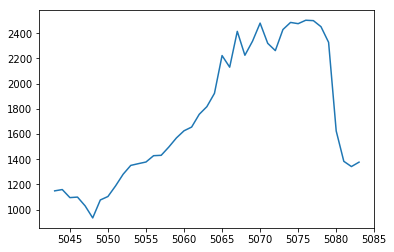

In [31]:
dfbudgetsubset[dfbudgetsubset.city_name =="TN: Memphis"].education_services.plot()

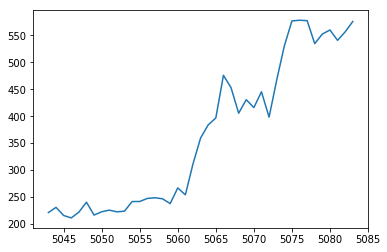

In [32]:
dfbudgetsubset[dfbudgetsubset.city_name =="TN: Memphis"].police.plot()

In [10]:
dfbudgets.city_name.unique()

array(['AK: Anchorage', 'AK: Fairbanks', 'AL: Birmingham', 'AL: Mobile',
       'AL: Montgomery', 'AR: Ft. Smith', 'AR: Little Rock', 'AZ: Mesa',
       'AZ: Phoenix', 'AZ: Tucson', 'Average for Cities', 'CA: Anaheim',
       'CA: Bakersfield', 'CA: Fremont', 'CA: Fresno',
       'CA: Huntington Beach', 'CA: Long Beach', 'CA: Los Angeles',
       'CA: Modesto', 'CA: Oakland', 'CA: Riverside', 'CA: Sacramento',
       'CA: San Diego', 'CA: San Francisco', 'CA: San Jose',
       'CA: Santa Ana', 'CA: Stockton', 'CO: Aurora',
       'CO: Colorado Springs', 'CO: Denver', 'CT: Bridgeport',
       'CT: Hartford', 'CT: New Haven', 'DC: Washington', 'DE: Dover',
       'DE: Wilmington', 'FL: Ft. Lauderdale', 'FL: Hialeah',
       'FL: Jacksonville', 'FL: Miami', 'FL: Orlando',
       'FL: St. Petersburg', 'FL: Tallahassee', 'FL: Tampa', 'GA: Atlanta',
       'GA: Columbus', 'IA: Cedar Rapids', 'IA: Des Moines', 'ID: Boise',
       'ID: Nampa', 'IL: Aurora', 'IL: Chicago', 'IN: Ft. Wayne',
    

In [3]:
dfspendpercap = pd.read_csv("SpendPerCapita.csv")

In [10]:
dfspendpercap

,City,Year,Total Revenue,Individual Income Tax,Education Services Expenditure,Social Services and Income Maintenance Expenditure,Transportation Expenditure,Police Protection Expenditure,Environment and Housing Expenditure,Total Expenditures,Intergovernmental Expenditures,Current Operations,Assistance and Subsidies,Census ID - City,City Population
0,AK: Anchorage,2010.0,"6,037",0,"2,880",104,536,434,544,"6,295",0,"4,634",0.0,22002001.0,287677.0
1,AK: Anchorage (City),2010.0,"6,037",0,"2,880",104,536,434,544,"6,295",0,"4,634",0.0,22002001.0,NaN
2,AK: Anchorage (County),2010.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
3,AK: Anchorage,2011.0,"5,816",0,"2,787",93,501,411,389,"5,947",0,"4,667",0.0,22002001.0,293310.0
4,AK: Anchorage (City),2011.0,"5,816",0,"2,787",93,501,411,389,"5,947",0,"4,667",0.0,22002001.0,NaN
5,AK: Anchorage (County),2011.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
6,AK: Anchorage,2012.0,"5,378",0,"2,430",97,337,447,303,"5,543",0,"4,360",0.0,22002001.0,296154.0
7,AK: Anchorage (City),2012.0,"5,378",0,"2,430",97,337,447,303,"5,543",0,"4,360",0.0,22002001.0,NaN
8,AK: Anchorage (County),2012.0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN
9,AK: Anchorage,2013.0,"5,695",0,"2,472",129,453,454,274,"5,734",0,"4,540",0.0,22002001.0,298233.0


In [9]:
dfspendpercap.shape

(5144, 15)

In [12]:
dfspendpercap.Year.unique()

array([ 2010.,  2011.,  2012.,  2013.,  2014.,  2015.,  2016.,  2017.,
          nan])

In [11]:
dfspendpercap.City.unique()

array(['AK: Anchorage', 'AK: Anchorage (City)', 'AK: Anchorage (County)',
       'AK: Fairbanks', 'AK: Fairbanks (City)', 'AK: Fairbanks (County)',
       'AL: Birmingham', 'AL: Birmingham (City)',
       'AL: Birmingham (County)', 'AL: Gadsden', 'AL: Gadsden (City)',
       'AL: Gadsden (County)', 'AL: Mobile', 'AL: Mobile (City)',
       'AL: Mobile (County)', 'AL: Montgomery', 'AL: Montgomery (City)',
       'AL: Montgomery (County)', 'AR: Ft. Smith', 'AR: Ft. Smith (City)',
       'AR: Ft. Smith (County)', 'AR: Little Rock',
       'AR: Little Rock (City)', 'AR: Little Rock (County)',
       'AR: Pine Bluff', 'AR: Pine Bluff (City)',
       'AR: Pine Bluff (County)', 'AZ: Mesa', 'AZ: Mesa (City)',
       'AZ: Mesa (County)', 'AZ: Phoenix', 'AZ: Phoenix (City)',
       'AZ: Phoenix (County)', 'AZ: Tucson', 'AZ: Tucson (City)',
       'AZ: Tucson (County)', 'Average for All Cities',
       'Average for All Cities (City)', 'Average for All Cities (County)',
       'CA: Anaheim', 'CA: 

# <span style="color: blue"> Crime Data </span>
- National Arrests
- Juvenile Arrests
- Crimes in Chicago, Dallas, LA, NY 

In [3]:
#national_arrests = "data/crime_data/arrests_national_adults.csv"
#chicago_crimes = "data/crime_data/Chicago Crimes_-_2001_to_Present.csv"
#dallas_crimes = "data/crime_data/Dallas Police Arrests.csv"
#juvenile_arrests = "data/crime_data/juvenile_arrests.csv"
#la_crimes = "data/crime_data/LA Crime_Data_from_2010_to_2019.csv"
#nypd_arrests_historic="data/crime_data/NYPD_Arrests_Data__Historic_.csv"
fbi_crime_data = "data/crime_data/FBI_Crime_Stats.xls" #NEW 

## FBI Crime data

- This dataset lists crime numbers for both violent crime and property crime.
- The data is organized by Metropolitan Statistical Area for the year 2017. Other years are available at the source.
- The values in the violent crime and Property crime columns are the sum of the individual crime types that follow.
- The row Rate per 100,0000 inhabitants can be used to compare areas with different populations.
- Values for rows "Total area reporting" and "Estimated Totals" are originally percents but shown here as decimals (i.e 0.9 =90%)

This original file for the data is an excel file. the First column in contains merged cells, which is why there are several NaN values after each entry. Each NaN belongs to the previous non-nan Value.

In [69]:
dfcrimes =  pd.read_excel(fbi_crime_data, header = 3, index_col = 0)
idxlist = dfcrimes.index.tolist() # convert dfcrimes dataframe index to a list to deal with the issue of merged cells in excel

currentval = ""
for indx,item in enumerate(idxlist): # loop through idxlist and replace nans with last known real value.
    if pd.isnull(item): #if the current value in the list is nan 
        idx = indx-1 # set idx to the current index -1, this is to allow reference to the previous entry which should not be null at this point
        idxlist[indx] = idxlist[idx] # set the value of the current item in the list to the value just before 
    
    
dfcrimes.index = idxlist #setting index to new list that should no longer have nan values 
df2017clean = dfcrimes[dfcrimes['Counties/principal cities']== "Rate per 100,000 inhabitants"]
df2017clean.head()

,Counties/principal cities,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
"Abilene, TX M.S.A.","Rate per 100,000 inhabitants",NaN,361.4,6.5,46.5,80.6,227.8,2903.1,649.9,2077.9,175.4
"Akron, OH M.S.A.2","Rate per 100,000 inhabitants",NaN,253.1,6,48.9,77.3,121,2564.5,563.3,1857.3,144.0
"Albany, GA M.S.A.","Rate per 100,000 inhabitants",NaN,734.8,11.8,28.2,159.9,534.9,3770.8,949.8,2676.9,144.2
"Albany, OR M.S.A.","Rate per 100,000 inhabitants",NaN,113.9,0,27.9,27.0,59,2690.3,378.6,2101.1,210.6
"Albany-Schenectady-Troy, NY M.S.A.","Rate per 100,000 inhabitants",NaN,289.7,2,38.9,68.7,180,2009.5,281.5,1646.0,82.0


In [70]:
df2017clean = df2017clean.rename(columns={"Counties/principal cities":""})
df2017clean = df2017clean.reset_index()
df2017clean = df2017clean.rename(columns={"index":"location",'':'rate'})
df2017clean[['city', 'state']]= df2017clean['location'].str.rsplit(' M',n=1,expand=True)
df2017clean = df2017clean.set_index('city')
df2017clean['year'] = 2017
df2017clean = df2017clean.rename(columns = lambda col: clean_text(col).lower())
df2017clean.head()

,location,rate,population,violent_crime,murder_and_nonnegligent_manslaughter,rape1,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,state,year
city,,,,,,,,,,,,,,
"Abilene, TX","Abilene, TX M.S.A.","Rate per 100,000 inhabitants",NaN,361.4,6.5,46.5,80.6,227.8,2903.1,649.9,2077.9,175.4,.S.A.,2017
"Akron, OH","Akron, OH M.S.A.2","Rate per 100,000 inhabitants",NaN,253.1,6,48.9,77.3,121,2564.5,563.3,1857.3,144.0,.S.A.2,2017
"Albany, GA","Albany, GA M.S.A.","Rate per 100,000 inhabitants",NaN,734.8,11.8,28.2,159.9,534.9,3770.8,949.8,2676.9,144.2,.S.A.,2017
"Albany, OR","Albany, OR M.S.A.","Rate per 100,000 inhabitants",NaN,113.9,0,27.9,27.0,59,2690.3,378.6,2101.1,210.6,.S.A.,2017
"Albany-Schenectady-Troy, NY","Albany-Schenectady-Troy, NY M.S.A.","Rate per 100,000 inhabitants",NaN,289.7,2,38.9,68.7,180,2009.5,281.5,1646.0,82.0,.S.A.,2017


In [78]:
years = ["2010","2011","2012","2013","2014","2015","2016"]
frames = []
for val in years: #loop through years list to create dataframes for the FBI crime data for years 2010-2016
    fbi_crime_data = "data/crime_data/FBI_Crime_"+val+".xls"
    frames.append(pd.read_excel(fbi_crime_data, header = 3, index_col = 0))

In [79]:
years = ["2010","2011","2012","2013","2014","2015","2016"] #loop through each crime year dataframe to clean up the index with city names
for i, val in enumerate(years):
    idxlist = frames[i].index.tolist()
    for indx,item in enumerate(idxlist): # loop through idxlist and replace nans with last known real value.
        if pd.isnull(item): #if the current value in the list is nan 
            idx = indx-1 # set idx to the current index -1, this is to allow reference to the previous entry which should not be null at this point
            idxlist[indx] = idxlist[idx]
    frames[i].index = idxlist

In [80]:
df2010 = frames[0] #pulled individual crime dataframes from the list made in previous steps
df2011 = frames[1]
df2012 = frames[2]
df2013 = frames[3]
df2014 = frames[4]
df2015 = frames[5]
df2016 = frames[6]

In [81]:
dflist = [df2010, df2011, df2012, df2013, df2014, df2015, df2016]

In [84]:
dfcleanlist = []
year = 2010
for b in dflist:
    z = b[b['Counties/principal cities']== "Rate per 100,000 inhabitants"]
    z = z.reset_index()
    z = z.rename(columns={"index":"location",'':'rate'})
    z[['city', 'state']]= z['location'].str.rsplit(' M',n=1,expand=True)
    z = z.set_index('city')
    z['year']= year
    z = z.rename(columns = lambda col: clean_text(col).lower())
    year = year +1
    dfcleanlist.append(z)

In [86]:
df2010clean = dfcleanlist[0]
df2011clean = dfcleanlist[1]
df2012clean = dfcleanlist[2]
df2013clean = dfcleanlist[3]
df2014clean = dfcleanlist[4]
df2015clean = dfcleanlist[5]
df2016clean = dfcleanlist[6]

In [94]:
Crimedfclean = df2010clean.append([df2011clean, df2011clean, df2012clean, df2013clean, df2014clean, df2015clean, df2016clean, df2017clean]).reset_index()

(524,)

In [92]:
Crimedfclean.to_csv("data/crime_data/FBI_Data_Clean.csv",index=False)

## National Arrests csv

#### This dataset contains the monthly number of arrests of adults for various offenses reported by participating law enforcement agencies from 1995–2016. The arrests are by offense and broken down by age and sex or age and race.

##### NOTE: Data is by state but the state column is empty. Need to explore source to understand why no states included

In [13]:
dfarrests = pd.read_csv(national_arrests)
dfarrests.head(10)

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,...,102,74.0,38.0,28.0,12581,263887632,4263,1373,103,183
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,...,3996,2343.0,961.0,713.0,12581,263887632,183478,94982,5365,6129
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,...,12005,6697.0,3166.0,2344.0,12581,263887632,514297,237138,12418,14376
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,...,1279,621.0,286.0,170.0,12581,263887632,101778,39235,2035,1323
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,...,4085,2464.0,1098.0,928.0,12581,263887632,161655,73552,2556,9460
5,1014,NaN,2016,ASR_DRG,Drug Abuse Violations,13310,264534532,920190,284712,46831,...,11068,5645.0,1852.0,796.0,12581,263887632,844916,325859,14813,11743
6,1015,NaN,2016,ASR_DRK,Drunkenness,13310,264534532,242255,58979,3986,...,5051,2973.0,1250.0,597.0,12581,263887632,228319,44180,3439,23967
7,1016,NaN,2016,ASR_DUI,Drive Under the Influence,13310,264534532,618382,209729,8223,...,15255,10142.0,5076.0,3596.0,12581,263887632,671271,114230,18819,14739
8,1017,NaN,2016,ASR_EMB,Embezzlement,13310,264534532,6450,6352,328,...,319,174.0,72.0,40.0,12581,263887632,7783,4586,234,103
9,1018,NaN,2016,ASR_FAM,Offenses Against the Family and Children,13310,264534532,50809,20743,568,...,750,364.0,188.0,131.0,12581,263887632,47616,21035,552,1804


In [16]:
dfarrests.columns

Index(['id', 'state_abbr', 'year', 'offense_code', 'offense_name', 'agencies',
       'population', 'total_male', 'total_female', 'm_18', 'm_19', 'm_20',
       'm_21', 'm_22', 'm_23', 'm_24', 'm_25_29', 'm_30_34', 'm_35_39',
       'm_40_44', 'm_45_49', 'm_50_54', 'm_55_59', 'm_60_64', 'm_65p', 'f_18',
       'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25_29', 'f_30_34',
       'f_35_39', 'f_40_44', 'f_45_49', 'f_50_54', 'f_55_59', 'f_60_64',
       'f_65p', 'race_agencies', 'race_population', 'white', 'black',
       'asian_pacific_islander', 'american_indian'],
      dtype='object')

In [15]:
dfarrests.state_abbr

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
639   NaN
640   NaN
641   NaN
642   NaN
643   NaN
Name: state_abbr, Length: 644, dtype: float64

# <span style="color: blue">  Protest activity and violence among protesters, police, and others. </span>
- Protest activity
- Police response
- Press activity
- Video clips of incidents

In [9]:
global_protests = "data/protests/global_protests.json"
police_accountability_project = "data/protests/Police_Accountability_Project.csv"
press_incidents = "data/protests/press_incidents.csv"
protests = "data/protests/protests.csv"
protest_violence = "data/protests/protest_violence.txt"
twitter_police_videos = "data/protests/twitter_police_videos.csv"
acled_usa = "data/protests/USA_2020_Aug29_ACLED.csv"

The armed location and event data project ACLED